# Import Libraries

In [ ]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
import re
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# data modelling
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# model evaluation
from sklearn.metrics import confusion_matrix, classification_report

# model optimization
from sklearn.model_selection import GridSearchCV

# pickle file
import pickle

# Import Dataset

In [ ]:
df = pd.read_csv('news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# Exploratory Data Analysis (EDA)

In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


Top 5 Topic

In [ ]:
df['title'].value_counts().head(5)

title
OnPolitics | 's politics blog                                                                         5
Michael Moore Owes Me $4.99                                                                           3
Hillary’s “Big Tent” is Obama’s “Grand Bargain” on Steroids                                           3
Get Ready For Civil Unrest: Survey Finds That Most Americans Are Concerned About Election Violence    3
The Dark Agenda Behind Globalism And Open Borders                                                     2
Name: count, dtype: int64

Count Label

In [ ]:
label = df['label']

label_counts = label.value_counts().sort_values(ascending=False)
label_counts

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

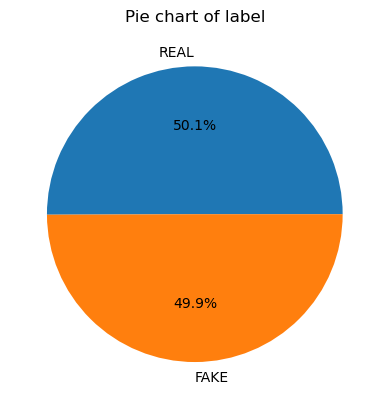

In [ ]:
# create a pie chart
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')

# add title
plt.title('Pie chart of label')

# show the plot
plt.show()

# Data Pre-processing

## Missing Value

In [ ]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

## Duplicated Value

In [ ]:
df.duplicated().sum()

0

In [ ]:
df_cp = df.copy()

## Drop column

In [ ]:
df_cp.drop(columns=['title', 'Unnamed: 0'], inplace=True)
df_cp.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


## Count len of text

In [ ]:
df_cp['text_len'] = df_cp['text'].apply(len)
df_cp.head()

,text,label,text_len
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660
4,It's primary day in New York and front-runners...,REAL,1840


In [ ]:
df_cp.describe()

,text_len
count,6335.000000
mean,4707.250355
std,5090.956446
min,1.000000
25%,1741.500000
50%,3642.000000
75%,6192.000000
max,115372.000000


## Outlier

In [ ]:
# Remove outliers (texts with very short lengths)
min_text_length = 20
df_cp = df_cp[df_cp['text_len'] >= min_text_length]
df_cp.describe()

,text_len
count,6296.000000
mean,4736.396601
std,5093.171590
min,34.000000
25%,1772.750000
50%,3665.000000
75%,6209.250000
max,115372.000000


## Clean Text

In [ ]:
# Defining a function to clean up the text
def clean(Text):
    sms = re.sub('[^a-zA-Z]', ' ', Text) #Replacing all non-alphabetic characters with a space
    sms = sms.lower() #converting to lowecase
    sms = sms.split()
    sms = ' '.join(sms)
    return sms

df_cp["clean_text"] = df_cp["text"].apply(clean)
df_cp.head()

,text,label,text_len,clean_text
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518,daniel greenfield a shillman journalism fellow...
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646,google pinterest digg linkedin reddit stumbleu...
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543,u s secretary of state john f kerry said monda...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660,kaydee king kaydeeking november the lesson fro...
4,It's primary day in New York and front-runners...,REAL,1840,it s primary day in new york and front runners...


## Tokenization

In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MARULI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\MARULI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df_cp["Tokenize_Text"] = df_cp.apply(lambda row: nltk.word_tokenize(row["clean_text"]), axis=1)
df_cp.head()

,text,label,text_len,clean_text,Tokenize_Text
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518,daniel greenfield a shillman journalism fellow...,"[daniel, greenfield, a, shillman, journalism, ..."
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646,google pinterest digg linkedin reddit stumbleu...,"[google, pinterest, digg, linkedin, reddit, st..."
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543,u s secretary of state john f kerry said monda...,"[u, s, secretary, of, state, john, f, kerry, s..."
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660,kaydee king kaydeeking november the lesson fro...,"[kaydee, king, kaydeeking, november, the, less..."
4,It's primary day in New York and front-runners...,REAL,1840,it s primary day in new york and front runners...,"[it, s, primary, day, in, new, york, and, fron..."


## Stop words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MARULI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# Removing the stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

df_cp["Nostopword_Text"] = df_cp["Tokenize_Text"].apply(remove_stopwords)
df_cp.head()

,text,label,text_len,clean_text,Tokenize_Text,Nostopword_Text
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518,daniel greenfield a shillman journalism fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel..."
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646,google pinterest digg linkedin reddit stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st..."
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543,u s secretary of state john f kerry said monda...,"[u, s, secretary, of, state, john, f, kerry, s...","[u, secretary, state, john, f, kerry, said, mo..."
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660,kaydee king kaydeeking november the lesson fro...,"[kaydee, king, kaydeeking, november, the, less...","[kaydee, king, kaydeeking, november, lesson, t..."
4,It's primary day in New York and front-runners...,REAL,1840,it s primary day in new york and front runners...,"[it, s, primary, day, in, new, york, and, fron...","[primary, day, new, york, front, runners, hill..."


## Lemmatization

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MARULI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MARULI\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    #word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

df_cp["Lemmatized_Text"] = df_cp["Nostopword_Text"].apply(lemmatize_word)
df_cp.head()

,text,label,text_len,clean_text,Tokenize_Text,Nostopword_Text,Lemmatized_Text
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,7518,daniel greenfield a shillman journalism fellow...,"[daniel, greenfield, a, shillman, journalism, ...","[daniel, greenfield, shillman, journalism, fel...","[daniel, greenfield, shillman, journalism, fel..."
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,2646,google pinterest digg linkedin reddit stumbleu...,"[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st...","[google, pinterest, digg, linkedin, reddit, st..."
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,2543,u s secretary of state john f kerry said monda...,"[u, s, secretary, of, state, john, f, kerry, s...","[u, secretary, state, john, f, kerry, said, mo...","[u, secretary, state, john, f, kerry, say, mon..."
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,2660,kaydee king kaydeeking november the lesson fro...,"[kaydee, king, kaydeeking, november, the, less...","[kaydee, king, kaydeeking, november, lesson, t...","[kaydee, king, kaydeeking, november, lesson, t..."
4,It's primary day in New York and front-runners...,REAL,1840,it s primary day in new york and front runners...,"[it, s, primary, day, in, new, york, and, fron...","[primary, day, new, york, front, runners, hill...","[primary, day, new, york, front, runners, hill..."


## Corpus

In [ ]:
#Creating a corpus of text feature to encode further into vectorized form
corpus= []
for row in df_cp["Lemmatized_Text"]:
    msg = ' '.join(row)
    corpus.append(msg)

## Vectorization

In [ ]:
#Changing text data in to numbers.
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
#Let's have a look at our feature
X.dtype

dtype('float64')

In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Split data

In [ ]:
#Setting values for labels and feature as y and X(we already did X in vectorizing...)
y = df_cp["label"]
# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5036, 54626)
(1260, 54626)
(5036,)
(1260,)


# Model Training

In [ ]:
def classification_eval(aktual, prediksi, name):

  cm = confusion_matrix(aktual, prediksi)
  # plot confusion matrix
  plt.figure(figsize=(8,6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
              xticklabels=['Predicted Negative', 'Predicted Positive'],
              yticklabels=['Actual Negative', 'Actual Positive'])
  plt.xlabel('Predicted Labels')
  plt.ylabel('Actual Lables')
  plt.title(f'Confusion Matrix - {name}')
  plt.show()

  print(classification_report(aktual, prediksi))

## Naive Bayes

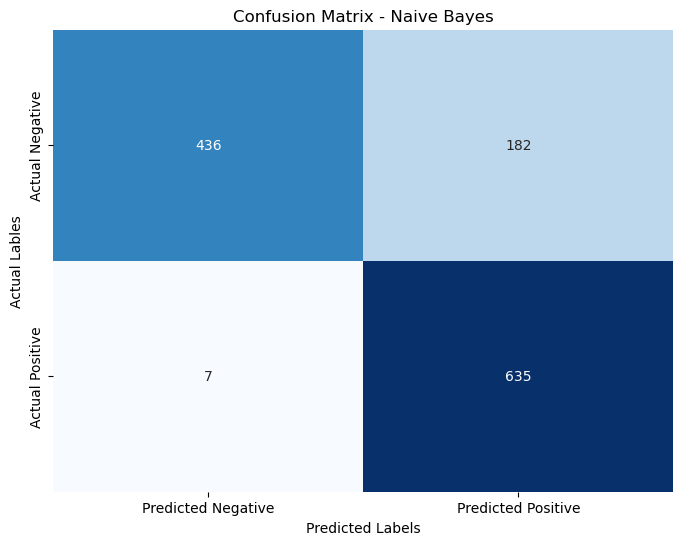

              precision    recall  f1-score   support

        FAKE       0.98      0.71      0.82       618
        REAL       0.78      0.99      0.87       642

    accuracy                           0.85      1260
   macro avg       0.88      0.85      0.85      1260
weighted avg       0.88      0.85      0.85      1260



In [ ]:
# mnb = MultinomialNB()

# mnb.fit(X_train, y_train)
# y_pred_mnv = mnb.predict(X_test)

# classification_eval(y_test, y_pred_mnv, 'Naive Bayes')

## Random Forest

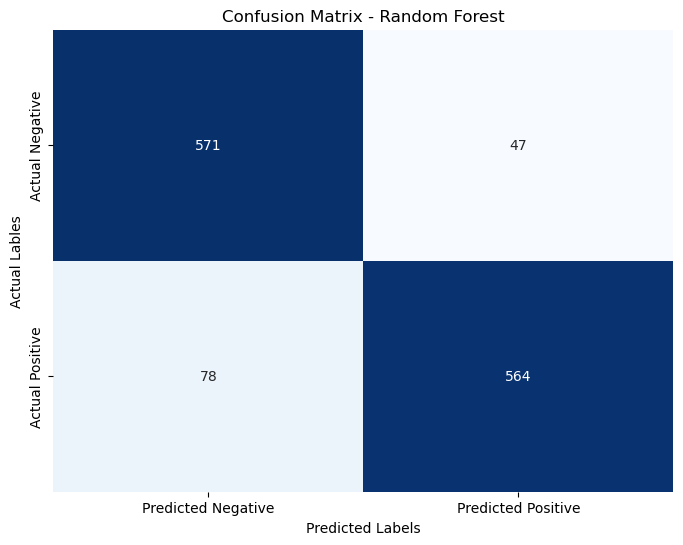

              precision    recall  f1-score   support

        FAKE       0.88      0.92      0.90       618
        REAL       0.92      0.88      0.90       642

    accuracy                           0.90      1260
   macro avg       0.90      0.90      0.90      1260
weighted avg       0.90      0.90      0.90      1260



In [ ]:
# rf = RandomForestClassifier()

# rf.fit(X_train, y_train)
# y_pred_rf = rf.predict(X_test)

# classification_eval(y_test, y_pred_rf, 'Random Forest')

## KNN

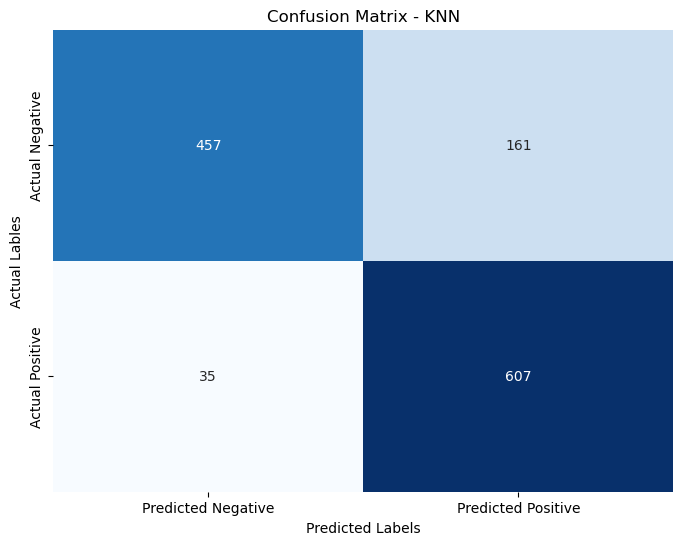

              precision    recall  f1-score   support

        FAKE       0.93      0.74      0.82       618
        REAL       0.79      0.95      0.86       642

    accuracy                           0.84      1260
   macro avg       0.86      0.84      0.84      1260
weighted avg       0.86      0.84      0.84      1260



In [ ]:
# knn = KNeighborsClassifier()

# knn.fit(X_train, y_train)
# y_pred_knn = knn.predict(X_test)

# classification_eval(y_test, y_pred_knn, 'KNN')

## Logistic Regression

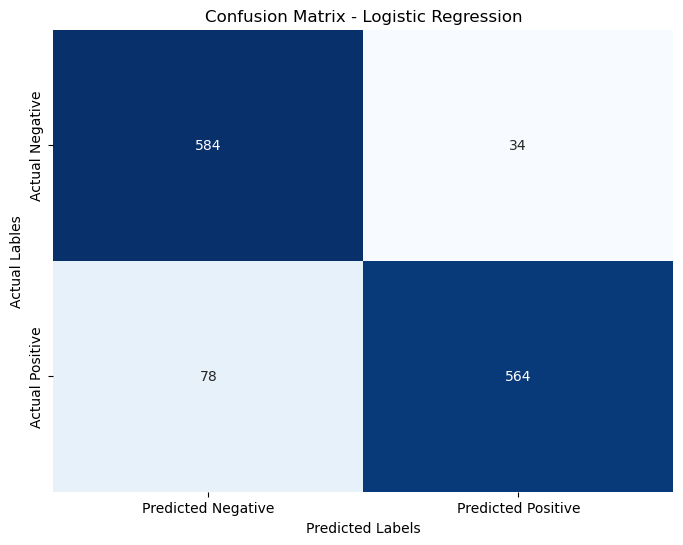

              precision    recall  f1-score   support

        FAKE       0.88      0.94      0.91       618
        REAL       0.94      0.88      0.91       642

    accuracy                           0.91      1260
   macro avg       0.91      0.91      0.91      1260
weighted avg       0.91      0.91      0.91      1260



In [ ]:
# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# y_pred_lr = lr.predict(X_test)

# classification_eval(y_test, y_pred_lr, 'Logistic Regression')

## SVC

93%

In [ ]:
# svc = SVC()

# svc.fit(X_train, y_train)
# y_pred_svc = svc.predict(X_test)

# classification_eval(y_test, y_pred_svc, 'SVC')

# Tuning Model

In [ ]:
# # define parameters for GridSearchCV
# parameters = {'C': [0.1, 1, 10, 100, 1000, 10000],
#               'solver': ['lbfgs', 'liblinear', 'newton-cg'],
#               'max_iter': [100, 1000]}

# grid_search = GridSearchCV(estimator=lr, param_grid=parameters, cv=3, verbose=2)

# grid_search.fit(X_train, y_train)

# # Best parameters
# print(f"Best Parameters found: {grid_search.best_params_}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   2.2s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   2.3s
[CV] END ..................C=0.1, max_iter=100, solver=lbfgs; total time=   2.7s
[CV] END ..............C=0.1, max_iter=100, solver=liblinear; total time=   2.7s
[CV] END ..............C=0.1, max_iter=100, solver=liblinear; total time=   1.4s
[CV] END ..............C=0.1, max_iter=100, solver=liblinear; total time=   1.2s
[CV] END ..............C=0.1, max_iter=100, solver=newton-cg; total time=   7.2s
[CV] END ..............C=0.1, max_iter=100, solver=newton-cg; total time=   5.8s
[CV] END ..............C=0.1, max_iter=100, solver=newton-cg; total time=   5.6s
[CV] END .................C=0.1, max_iter=1000, solver=lbfgs; total time=   2.2s
[CV] END .................C=0.1, max_iter=1000, solver=lbfgs; total time=   1.9s
[CV] END .................C=0.1, max_iter=1000,

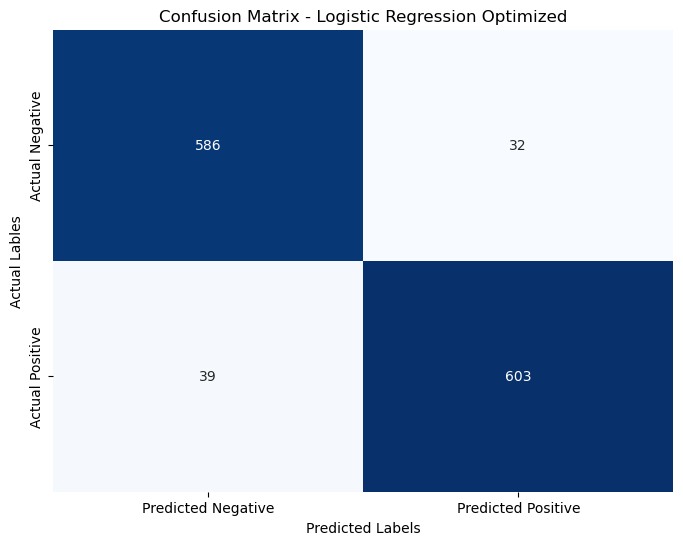

              precision    recall  f1-score   support

        FAKE       0.94      0.95      0.94       618
        REAL       0.95      0.94      0.94       642

    accuracy                           0.94      1260
   macro avg       0.94      0.94      0.94      1260
weighted avg       0.94      0.94      0.94      1260



In [ ]:
lf_2 = LogisticRegression(C=1000, solver='liblinear', max_iter= 100)

model_lf = lf_2.fit(X_train, y_train)
y_pred_lf_2 = lf_2.predict(X_test)

classification_eval(y_test, y_pred_lf_2, 'Logistic Regression Optimized')

In [ ]:
# pickle.dump(model_lf, open('model_lf.pkl', 'wb'))